In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, sv file I/o (e-g• pd.read_csv)
import os# to use operating system dependent functionality
import librosa # to extract speech features
import wave # read and write WAV files
import matplotlib.pyplot as plt # to generate the visualizations
# MLP Classifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
# LSTM Classifier
import keras
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras. layers import *
from keras.optimizers import RMSprop
import warnings # Ignore warnings for cleaner output
warnings.filterwarnings("ignore")

In [2]:
def extract_mfcc(wav_file_name):
  y, sr = librosa.load(wav_file_name)
  mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T,axis=0)
  return mfccs

In [3]:
import os
import librosa
import numpy as np

# Function to extract MFCC features from audio file
def extract_mfcc(wav_file_name):
    y, sr = librosa.load(wav_file_name)
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfccs

# Load ravdess speech data
radvess_speech_labels = []
ravdess_speech_data = []

data_dir = r'C:\Users\Vansh Gupta\Desktop\Major 2\RAVDESS'  # Update with the path to your ravdess dataset directory

for dirname, _, filenames in os.walk(data_dir):
    for filename in filenames:
        radvess_speech_labels.append(int(filename[7:8]) - 1)
        wav_file_name = os.path.join(dirname, filename)
        ravdess_speech_data.append(extract_mfcc(wav_file_name))

print("Finish Loading the Dataset")

Finish Loading the Dataset


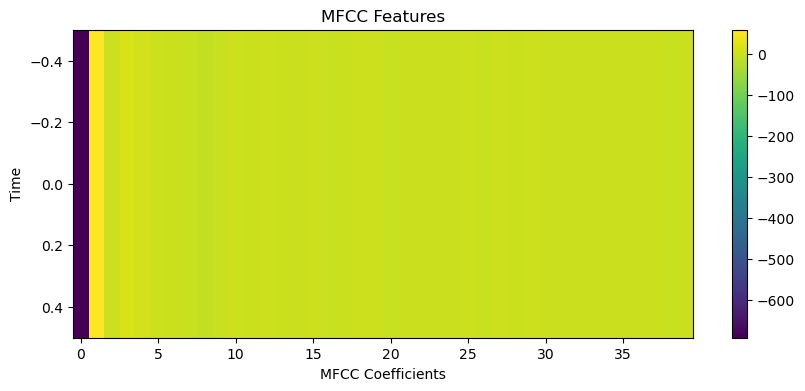

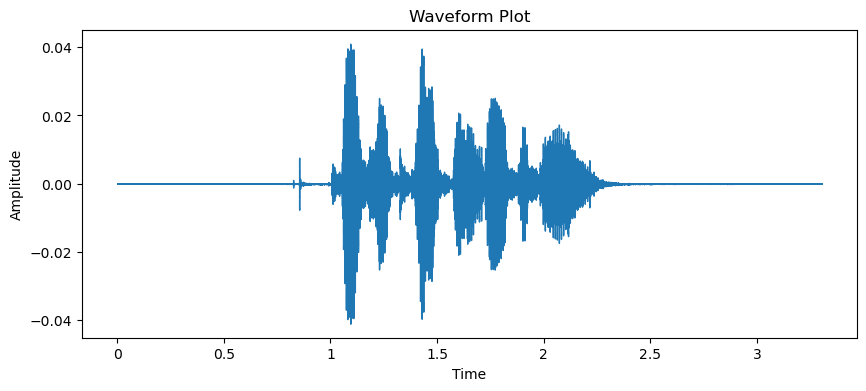

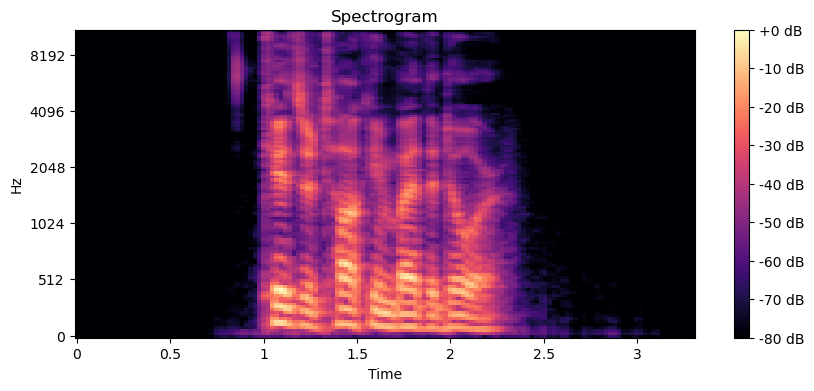

In [4]:
# Assuming you have the necessary libraries imported already

# Choose a specific example from the loaded dataset
example_index = 2  # You can change this index to any valid index within the loaded dataset

# Extracted MFCC features and corresponding label for the chosen example
example_mfccs = ravdess_speech_data[example_index]
example_label = radvess_speech_labels[example_index]

# Display the MFCC features
plt.figure(figsize=(10, 4))
plt.imshow(example_mfccs.reshape(1, -1), cmap='viridis', aspect='auto')
plt.title('MFCC Features')
plt.xlabel('MFCC Coefficients')
plt.ylabel('Time')
plt.colorbar()
plt.show()

# Load the raw audio signal for the chosen example
wav_file_path = r'C:\Users\Vansh Gupta\Desktop\Major 2\RAVDESS\Actor_01\03-01-01-01-01-01-01.wav'  # Update with the actual path
y, sr = librosa.load(wav_file_path)

# Generate and display a waveform plot
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform Plot')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

plt.figure(figsize=(10, 4))
S = librosa.feature.melspectrogram(y=y, sr=sr)
S_db = librosa.power_to_db(S, ref=np.max)

librosa.display.specshow(S_db, y_axis='mel', x_axis='time', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()


# Play the audio file
from IPython.display import Audio

# Assuming the file path is available
wav_file_path = r'C:\Users\Vansh Gupta\Desktop\Major 2\RAVDESS\Actor_01\03-01-01-01-01-01-01.wav'  # Update with the actual path
Audio(wav_file_path)

In [5]:
ravdess_speech_data

[array([-6.9779260e+02,  5.4890041e+01,  6.6346550e-01,  1.2435786e+01,
         7.7339516e+00,  5.3075010e-01, -3.2166312e+00, -3.1593945e+00,
        -1.0977551e+01, -2.8487110e+00,  8.1529754e-01, -3.0370669e+00,
         1.9554465e+00, -3.7356682e+00,  4.3770033e-01,  7.8235650e-01,
        -4.0714283e+00, -1.8607764e+00, -1.3236902e+00, -9.2046332e-01,
        -5.9476109e+00, -5.0543833e-01, -2.3373916e+00, -4.5227795e+00,
        -1.6797225e+00, -8.1932092e-01, -4.8584828e+00,  2.5533605e-01,
        -2.1487043e+00,  1.4505522e-01, -2.0357563e+00, -2.1196339e+00,
        -2.7125890e+00, -1.8361270e+00, -3.2048051e+00, -1.5453684e+00,
        -1.0909370e+00, -1.7701062e+00, -3.5011320e+00, -1.5380875e+00],
       dtype=float32),
 array([-6.9285577e+02,  5.5363899e+01, -1.5483193e+00,  1.6038305e+01,
         8.8188105e+00, -1.4658634e-01, -1.3733919e+00, -5.2931800e+00,
        -1.1623183e+01, -1.3482836e+00,  8.4371459e-01, -2.6412783e+00,
         1.0172499e+00, -3.2715344e+00, 

In [6]:
#### convert data and label to array
ravdess_speech_data_array = np.asarray(ravdess_speech_data) # convert the input to an array
ravdess_speech_label_array = np.array(radvess_speech_labels)
ravdess_speech_label_array.shape # get tuple of array dimensions
#### make categorical labels
labels_categorical=to_categorical(ravdess_speech_label_array) # converts a class vector (integers) to binary class matrix
labels_categorical. shape

(2880, 8)

In [7]:
ravdess_speech_data_array.shape

(2880, 40)

In [8]:
x_train,x_test,y_train,y_test = train_test_split(np.array(ravdess_speech_data_array),labels_categorical, test_size=0.20, random_state=9)

In [9]:
# Split the training, validating, and testing sets
number_of_samples = ravdess_speech_data_array.shape[0]
training_samples = int(number_of_samples * 0.8)
validation_samples = int (number_of_samples * 0.1)
test_samples = int (number_of_samples * 0.1)

In [10]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten

In [11]:
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Activation, Flatten

# Reshape data for CNN-LSTM hybrid model
x_train_reshaped = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test_reshaped = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

# Define the CNN-LSTM hybrid model
def create_model_CNN_LSTM():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(x_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(128, return_sequences=False))
    model.add(Dense(128))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(64))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(8))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Create and train the CNN-LSTM hybrid model
cnn_lstm_model = create_model_CNN_LSTM()
history = cnn_lstm_model.fit(x_train_reshaped, y_train, epochs=150, batch_size=30, validation_data=(x_test_reshaped, y_test))




Epoch 1/150


77/77 [==============================] - 10s 42ms/step - loss: 2.0611 - accuracy: 0.1506 - val_loss: 1.9973 - val_accuracy: 0.2378
Epoch 2/150
77/77 [==============================] - 2s 26ms/step - loss: 1.9752 - accuracy: 0.2188 - val_loss: 1.8805 - val_accuracy: 0.3177
Epoch 3/150
77/77 [==============================] - 1s 14ms/step - loss: 1.8996 - accuracy: 0.2565 - val_loss: 1.8258 - val_accuracy: 0.3333
Epoch 4/150
77/77 [==============================] - 1s 16ms/step - loss: 1.8364 - accuracy: 0.2964 - val_loss: 1.7684 - val_accuracy: 0.3177
Epoch 5/150
77/77 [==============================] - 2s 26ms/step - loss: 1.8248 - accuracy: 0.2938 - val_loss: 1.7650 - val_accuracy: 0.3438
Epoch 6/150
77/77 [==============================] - 2s 26ms/step - loss: 1.7798 - accuracy: 0.3064 - val_loss: 1.7310 - val_accuracy: 0.3472
Epoch 7/150
77/77 [==============================] - 2s 24ms/step - loss: 1.7570 - accuracy: 0.3142 - val_loss: 1.6735 - val_accuracy: 0.3472


77/77 [==============================] - 2s 23ms/step - loss: 0.1385 - accuracy: 0.9648 - val_loss: 0.8970 - val_accuracy: 0.8403
Epoch 52/150
77/77 [==============================] - 2s 25ms/step - loss: 0.2190 - accuracy: 0.9362 - val_loss: 0.6728 - val_accuracy: 0.8646
Epoch 53/150
77/77 [==============================] - 2s 24ms/step - loss: 0.0843 - accuracy: 0.9718 - val_loss: 0.7369 - val_accuracy: 0.8698
Epoch 54/150
77/77 [==============================] - 2s 25ms/step - loss: 0.0566 - accuracy: 0.9857 - val_loss: 0.7510 - val_accuracy: 0.8854
Epoch 55/150
77/77 [==============================] - 2s 26ms/step - loss: 0.0575 - accuracy: 0.9852 - val_loss: 0.6666 - val_accuracy: 0.8872
Epoch 56/150
77/77 [==============================] - 2s 25ms/step - loss: 0.0368 - accuracy: 0.9905 - val_loss: 0.7207 - val_accuracy: 0.8924
Epoch 57/150
77/77 [==============================] - 2s 25ms/step - loss: 0.0250 - accuracy: 0.9944 - val_loss: 0.7993 - val_accuracy: 0.8819
Epoch 58/150

77/77 [==============================] - 2s 26ms/step - loss: 0.1813 - accuracy: 0.9510 - val_loss: 0.9825 - val_accuracy: 0.8351
Epoch 109/150
77/77 [==============================] - 2s 27ms/step - loss: 0.0976 - accuracy: 0.9692 - val_loss: 0.8510 - val_accuracy: 0.8681
Epoch 110/150
77/77 [==============================] - 2s 26ms/step - loss: 0.0335 - accuracy: 0.9905 - val_loss: 0.7941 - val_accuracy: 0.8854
Epoch 111/150
77/77 [==============================] - 2s 23ms/step - loss: 0.0497 - accuracy: 0.9900 - val_loss: 0.8951 - val_accuracy: 0.8872
Epoch 112/150
77/77 [==============================] - 2s 23ms/step - loss: 0.0313 - accuracy: 0.9913 - val_loss: 0.9238 - val_accuracy: 0.8750
Epoch 113/150
77/77 [==============================] - 2s 24ms/step - loss: 0.0782 - accuracy: 0.9861 - val_loss: 1.0422 - val_accuracy: 0.8507
Epoch 114/150
77/77 [==============================] - 2s 23ms/step - loss: 0.0661 - accuracy: 0.9839 - val_loss: 0.9934 - val_accuracy: 0.8681
Epoch 

In [12]:
# Evaluate the model on the test set
loss, accuracy = cnn_lstm_model.evaluate(x_test_reshaped, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

18/18 [==============================] - 0s 18ms/step - loss: 0.9468 - accuracy: 0.8507
Test Accuracy: 85.07%


In [13]:
cnn_lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 36, 64)            384       
                                                                 
 max_pooling1d (MaxPooling1  (None, 18, 64)            0         
 D)                                                              
                                                                 
 lstm (LSTM)                 (None, 128)               98816     
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 activation (Activation)     (None, 128)               0         
                                                        

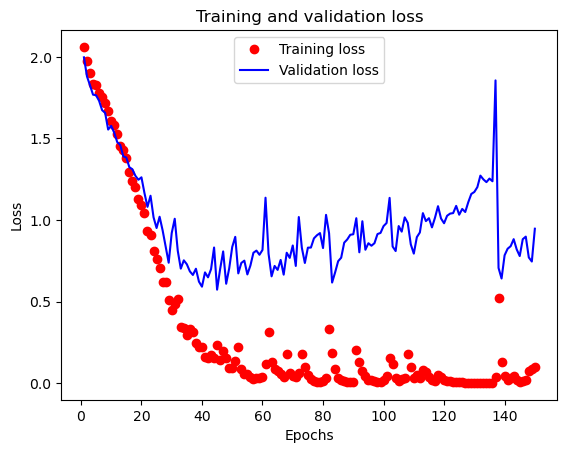

In [14]:
### loss plots using CNN-LSTM model
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'ro', label= 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

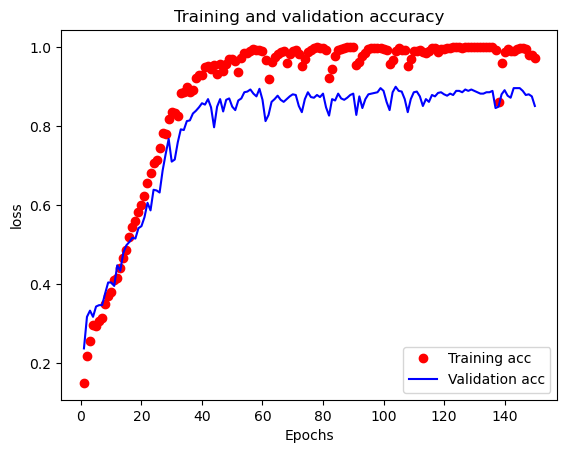

In [15]:
### accuracy plots using LSTM model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc,'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt. ylabel('loss')
plt.legend()
plt. show()

In [16]:
emotions={1 : 'neutral', 2 : 'calm', 3 : 'happy', 4 : 'sad' , 5 : 'angry', 6 : 'fearful', 7 : 'disgust', 8 : 'surprised'}
def predict(wav_filepath):
  test_point=extract_mfcc(wav_filepath)
  test_point=np.reshape(test_point, newshape=(1,40,1))
  predictions=cnn_lstm_model.predict(test_point)
  print(emotions[np.argmax(predictions[0])+1])

In [17]:
# Save the model architecture as JSON
model_json = cnn_lstm_model.to_json()
with open("cnn_lstm_model.json", "w") as json_file:
    json_file.write(model_json)

# Save the model weights
cnn_lstm_model.save_weights("cnn_lstm_model_weights.h5")

In [18]:
# Assuming the file path is available
wav_file_path = r'C:\Users\Vansh Gupta\Desktop\Major 2\RAVDESS\Actor_01\03-01-01-01-02-02-01.wav'  # Update with the actual path
Audio(wav_file_path)

In [19]:
predict(r'C:\Users\Vansh Gupta\Desktop\Major 2\RAVDESS\Actor_01\03-01-01-01-02-02-01.wav')

1/1 [==============================] - 5s 5s/step
neutral


In [20]:
import tkinter as tk
from tkinter import filedialog, messagebox
from IPython.display import Audio
import numpy as np
import librosa

# Define function to extract MFCC features
def extract_mfcc(wav_file_name):
    y, sr = librosa.load(wav_file_name)
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfccs

# Define function to predict emotion
def predict_emotion(wav_file_path):
    test_point = extract_mfcc(wav_file_path)
    test_point = np.reshape(test_point, newshape=(1, 40, 1))
    predictions = cnn_lstm_model.predict(test_point)
    emotion_index = np.argmax(predictions[0]) + 1
    return emotions[emotion_index]

# Function to handle button click event for selecting audio file
def select_file():
    file_path = filedialog.askopenfilename(title="Select Audio File", filetypes=(("WAV files", "*.wav"), ("All files", "*.*")))
    if file_path:
        txt_selected_file.delete(0, tk.END)
        txt_selected_file.insert(0, file_path)

# Function to handle button click event for predicting emotion
def predict_emotion_gui():
    file_path = txt_selected_file.get()
    if file_path:
        try:
            predicted_emotion = predict_emotion(file_path)
            messagebox.showinfo("Predicted Emotion", f"The predicted emotion is: {predicted_emotion}")
        except Exception as e:
            messagebox.showerror("Error", f"An error occurred: {str(e)}")
    else:
        messagebox.showerror("Error", "Please select an audio file first.")

# Function to play the selected audio file
def play_audio():
    file_path = txt_selected_file.get()
    if file_path:
        try:
            audio = Audio(file_path)
            display(audio)
        except Exception as e:
            messagebox.showerror("Error", f"An error occurred while playing the audio: {str(e)}")
    else:
        messagebox.showerror("Error", "Please select an audio file first.")

# Create the main GUI window
root = tk.Tk()
root.title("Emotion Recognition from Audio")
root.geometry("600x250")  # Set window size

# Create widgets with styling options
lbl_select_file = tk.Label(root, text="Select Audio File:", font=("Helvetica", 12))
lbl_select_file.grid(row=0, column=0, padx=10, pady=5)

txt_selected_file = tk.Entry(root, width=40, font=("Helvetica", 10))
txt_selected_file.grid(row=0, column=1, padx=10, pady=5, columnspan=2)

btn_browse = tk.Button(root, text="Browse", command=select_file, bg="#4CAF50", fg="white", font=("Helvetica", 10))
btn_browse.grid(row=0, column=3, padx=5, pady=5)

btn_play_audio = tk.Button(root, text="Play Audio", command=play_audio, bg="#FFD700", fg="black", font=("Helvetica", 12))
btn_play_audio.grid(row=1, column=0, padx=10, pady=10)

btn_predict = tk.Button(root, text="Predict Emotion", command=predict_emotion_gui, bg="#008CBA", fg="white", font=("Helvetica", 12))
btn_predict.grid(row=1, column=1, columnspan=3, padx=10, pady=10)

# Run the GUI application
root.mainloop()

1/1 [==============================] - 0s 59ms/step


1/1 [==============================] - 0s 63ms/step
